<a href="https://colab.research.google.com/github/kevin-r-murphy/ba820/blob/main/BA820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Beyond the Headlines: Machine Learning Insights for News Categories*

Our data is sourced from the news dataset news headlines from 2012 to 2022 from HuffPost available on Kaggle: https://www.kaggle.com/datasets/rmisra/news-category-dataset.



Each record in the dataset consists of the following attributes:

1 link: link to the original news article.

2 headline: the headline of the news article.

3 category: category in which the article was published.

4 short_description: Abstract of the news article.

5 authors: list of authors who contributed to the article.

6 date: publication date of the article.

## Uploading Data

In [ ]:
import pandas as pd
df = pd.read_json('https://raw.githubusercontent.com/kevin-r-murphy/ba820/main/News_Category_Dataset_v3.json', lines=True)
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


## Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


Though the above output doesn't say it has null values, we could observe that there were blank spaces.

In [ ]:
df[df['link']=='']

,link,headline,category,short_description,authors,date


In [ ]:
df[df['headline']=='']

,link,headline,category,short_description,authors,date
90944,https://www.huffingtonpost.com/entry/lincoln-2...,,POLITICS,,"Robert Moran, ContributorRobert Moran leads Br...",2015-08-22
95567,https://www.huffingtonpost.com/entry/post_9671...,,RELIGION,Let everyone not wrapped in tired and disprove...,"Matthew Fox, ContributorRadical theologian Mat...",2015-06-30
103675,https://www.huffingtonpost.com/entry/us-and-eu...,,WORLDPOST,,"Natasha Srdoc, ContributorAuthor, Economist, C...",2015-03-29
109100,https://www.huffingtonpost.com/entry/disney-ce...,,BUSINESS,,"Gary Snyder, ContributorWriter and Media Strat...",2015-01-25
110153,https://www.huffingtonpost.com/entry/beverly-h...,,MEDIA,,"Gary Snyder, ContributorWriter and Media Strat...",2015-01-13
122145,https://www.huffingtonpost.com/entry/beverly-h...,,QUEER VOICES,,"Gary Snyder, ContributorWriter and Media Strat...",2014-08-28


In [ ]:
df=df[df['headline']!='']

In [ ]:
df[df['category']=='']

,link,headline,category,short_description,authors,date


In [ ]:
df[df['short_description']=='']

,link,headline,category,short_description,authors,date
20773,https://www.huffingtonpost.com/entry/the-big-b...,The Big Blue Wave,COMEDY,,"Shan Wells, ContributorSciency sun venerator +...",2017-11-10
21523,https://www.huffingtonpost.com/entry/inside-ru...,"Inside Rukban Camp, One Of Syria’s Most Desper...",WORLD NEWS,,"Yasser Allawi, Syria Deeply",2017-10-31
22793,https://www.huffingtonpost.com/entry/syrian-re...,Syrian Refugees Return From Lebanon Only To Fl...,WORLD NEWS,,"Abby Sewell, Refugees Deeply",2017-10-14
32223,https://www.huffingtonpost.com/entry/your-guid...,Your Guide To The Best BBQ In St. Louis Accord...,TASTE,,,2017-06-19
34488,https://www.huffingtonpost.com/entry/the-bechd...,The Bechdel Test,COMEDY,,"Hilary Fitzgerald Campbell, ContributorHilary'...",2017-05-24
...,...,...,...,...,...,...
206924,https://www.huffingtonpost.com/entry/true-lgbt...,True LGBTQ Stories: When A College Football Te...,QUEER VOICES,,"Nathan Manske, Contributor\nExecutive Director...",2012-02-25
206939,https://www.huffingtonpost.com/entry/chasing-i...,'Chasing Ice' -- The Climate Change Debate Is ...,ENVIRONMENT,,"Greg Reitman, Contributor\nFounder of Blue Wat...",2012-02-25
208803,https://www.huffingtonpost.com/entry/love-is-l...,Practice for International Kissing Day: 'Love ...,IMPACT,,"Karen Dalton-Beninato, Contributor\nWriter Nea...",2012-02-05
208865,https://www.huffingtonpost.com/entry/zach-hust...,"Zach Huston, Victim of Brutal Ohio School Bull...",QUEER VOICES,,"Ian Thompson, Contributor\nLegislative Represe...",2012-02-04


In [ ]:
df=df[df['short_description']!='']

In [ ]:
df[df['authors']=='']

,link,headline,category,short_description,authors,date
5,https://www.huffpost.com/entry/belk-worker-fou...,Cleaner Was Dead In Belk Bathroom For 4 Days B...,U.S. NEWS,The 63-year-old woman was seen working at the ...,,2022-09-22
20,https://www.huffpost.com/entry/golden-globes-r...,Golden Globes Returning To NBC In January Afte...,ENTERTAINMENT,"For the past 18 months, Hollywood has effectiv...",,2022-09-20
21,https://www.huffpost.com/entry/biden-us-forces...,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,,2022-09-19
31,https://www.huffpost.com/entry/2020-census-fal...,Watchdog Report Finds Some Census Takers Who F...,U.S. NEWS,"Despite entering false information, their work...",,2022-09-18
38,https://www.huffpost.com/entry/african-land-sn...,German Customs Officials Follow Trail Of Slime...,WEIRD NEWS,“Never in the history of the Duesseldorf custo...,,2022-09-16
...,...,...,...,...,...,...
209520,https://www.huffingtonpost.comhttp://www.engad...,"First White House Chief Technology Officer, An...",TECH,He was appointed with a fair bit of fanfare as...,,2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [ ]:
df=df[df['authors']!='']

In [ ]:
df[df['date']=='']

,link,headline,category,short_description,authors,date


In [ ]:
#Selecting only 500 rows on random basis
df= df.sample(n=500, random_state=42)

In [ ]:
df

,link,headline,category,short_description,authors,date
54227,https://www.huffingtonpost.com/entry/who-says-...,WHO Says All Countries Should Tax Sugary Drink...,HEALTHY LIVING,A 20 percent tax could reduce the consumption ...,"Stephanie Nebehay, Reuters",2016-10-11
93887,https://www.huffingtonpost.com/entry/mcity-mic...,This Fake Town Exists Solely To Test Driverles...,BUSINESS,Self-driving vehicles now have a neighborhood ...,Jenny Che,2015-07-20
133909,https://www.huffingtonpost.com/entry/greek-sal...,"15 Different, Delicious Ways To Interpret Gree...",FOOD & DRINK,"Pizza, pasta, grilled cheese... you name it.",Julie R. Thomson,2014-04-15
208957,https://www.huffingtonpost.com/entry/new-years...,Two Steps to Rebooting Your Resolutions,WELLNESS,"Real change can be hard to come by, and it's t...","Heidi Grant Halvorson, Ph.D., Contributor\nAut...",2012-02-03
32968,https://www.huffingtonpost.com/entry/georgia-s...,Georgia State Senator Under Fire For Photo Wit...,POLITICS,"Republican Michael Williams spoke at the ""Marc...",Carla Herreria,2017-06-11
...,...,...,...,...,...,...
185478,https://www.huffingtonpost.com/entry/kindle-eb...,Kindle eBook Refunds: Amazon Says Users Are En...,TECH,"If the court approves the settlements, the pub...","Reuters, Reuters",2012-10-13
162118,https://www.huffingtonpost.com/entry/dear-mom-...,Dear Mom With a Prenatal Down Syndrome Diagnosis,PARENTING,I cannot tell you what challenges your preciou...,"Lauren Warner, Contributor\nBlogger and Editor...",2013-06-19
164605,https://www.huffingtonpost.com/entry/sars-like...,SARS-Like Virus: 17 Now Dead From Coronavirus ...,WELLNESS,"A non-Saudi, whose nationality and age were no...","Reuters, Reuters",2013-05-23
25603,https://www.huffingtonpost.com/entry/bill-gard...,Democrats Target One Of Their Own For Remainin...,POLITICS,"They said he risks ""tarnishing"" his legacy.",Sam Levine,2017-09-08


## Exploratory Data Analysis (EDA)

In [ ]:
#Printng the number of unique values of each column
print(df.nunique())

link                 500
headline             500
category              42
short_description    500
authors              370
date                 451
dtype: int64


In [ ]:
#Printing the number of articles per each category
categorical_columns = ['category']
for column in categorical_columns:
    print(f"\nDistribution of categories in column '{column}':")
    print(df[column].value_counts())


Distribution of categories in column 'category':
POLITICS          82
WELLNESS          47
ENTERTAINMENT     47
STYLE & BEAUTY    32
PARENTING         24
HEALTHY LIVING    16
TRAVEL            16
HOME & LIVING     13
FOOD & DRINK      12
BUSINESS          12
QUEER VOICES      12
COMEDY            11
BLACK VOICES      10
GREEN             10
WOMEN              9
MEDIA              9
SPORTS             9
WORLD NEWS         8
SCIENCE            8
TECH               7
U.S. NEWS          7
PARENTS            7
MONEY              7
CRIME              6
STYLE              6
RELIGION           6
IMPACT             6
TASTE              6
THE WORLDPOST      6
WORLDPOST          5
WEIRD NEWS         5
COLLEGE            5
ARTS & CULTURE     5
WEDDINGS           4
EDUCATION          4
DIVORCE            4
LATINO VOICES      4
GOOD NEWS          4
ENVIRONMENT        3
FIFTY              3
CULTURE & ARTS     2
ARTS               1
Name: category, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

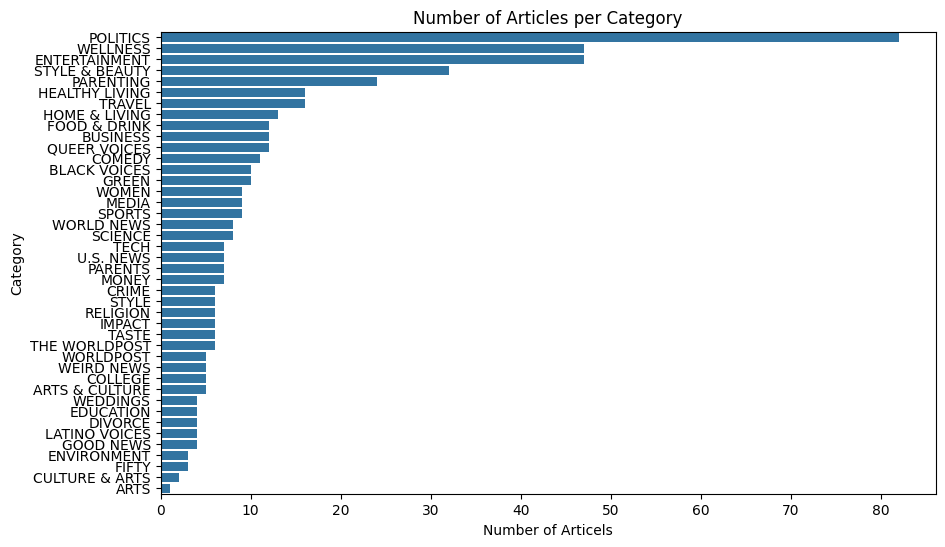

In [ ]:
#Plotting Number of Articles by Category
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=df, order = df['category'].value_counts().index)
plt.title('Number of Articles per Category')
plt.xlabel('Number of Articels')
plt.ylabel('Category')
plt.show()

The graph above shows the frequency of nubmer of articles that were published with respect to each of the 42 categories across our dataset. From this, it can be seen clearly that "Politics" is the most common news category from 2012 to 2022, followed by "Wellness" and "Style and beauty" whereas "Arts" is the least common.

In [ ]:
years = sorted(df['year'].unique())
years

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

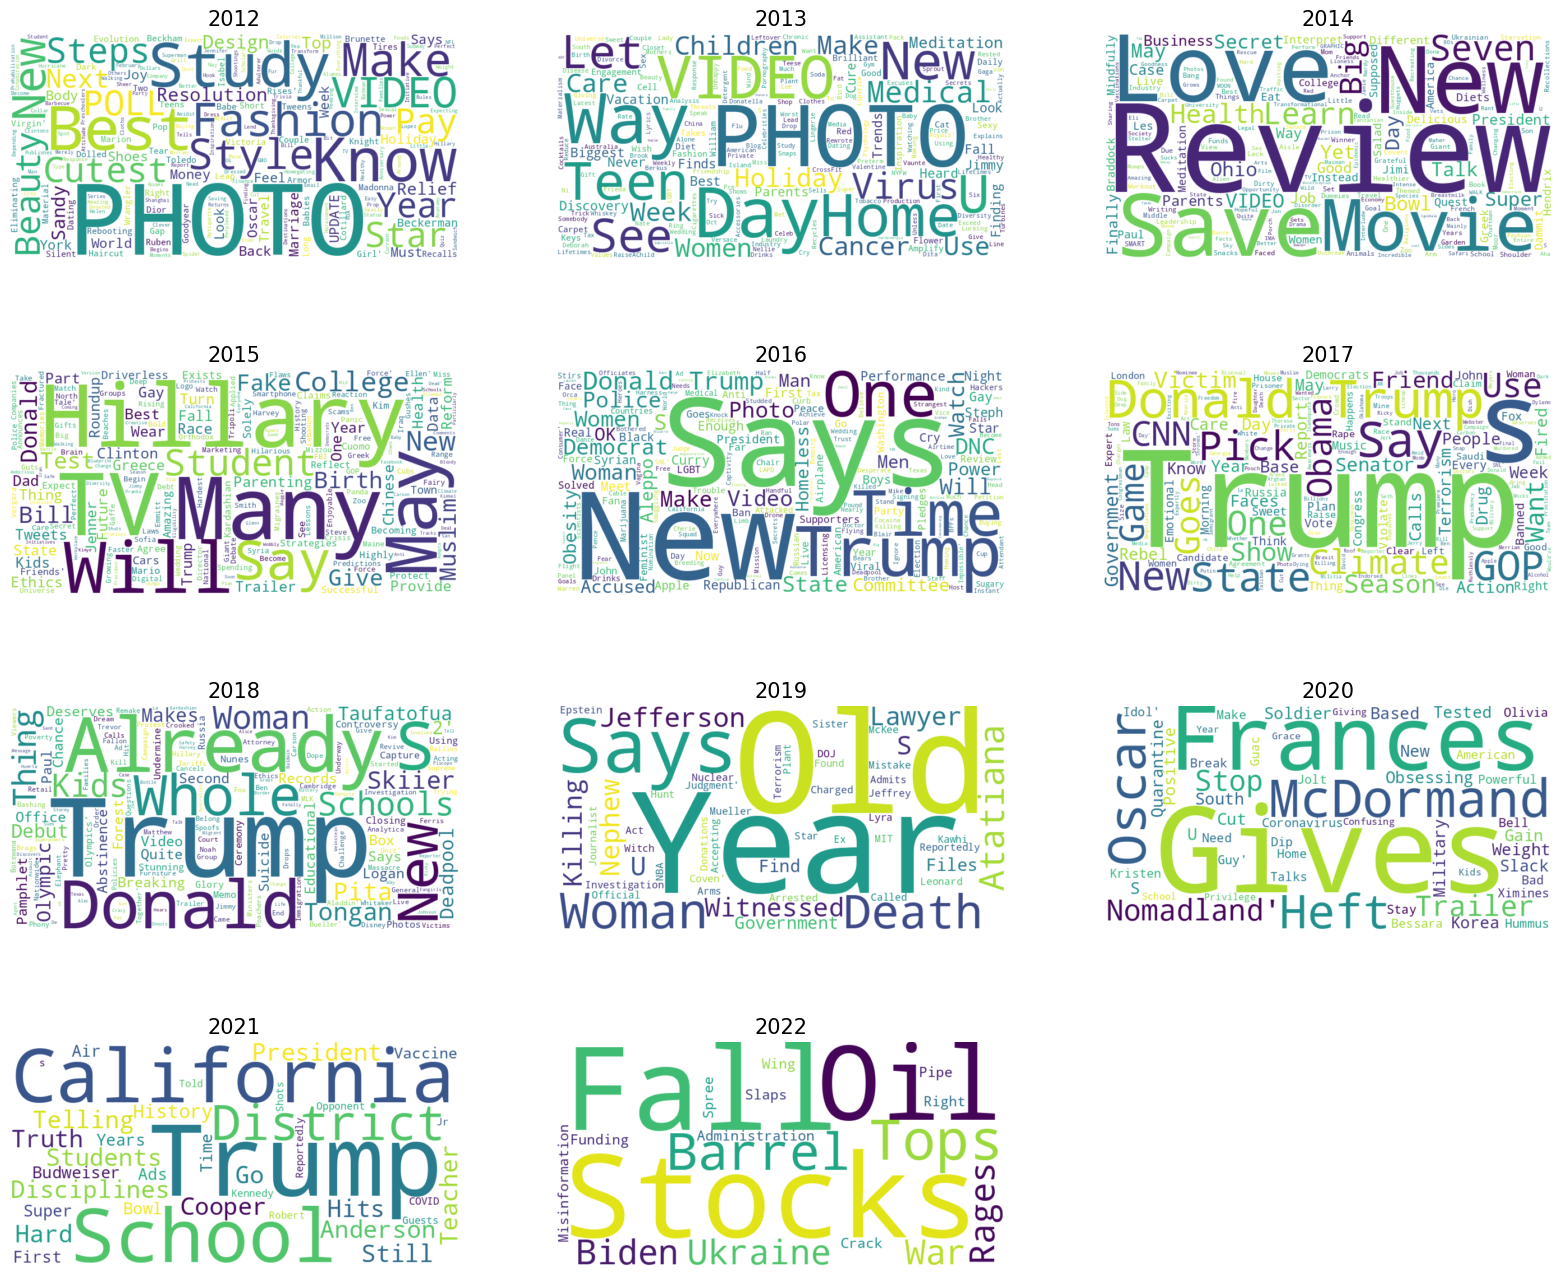

In [ ]:
from wordcloud import WordCloud

#Number of rows and grid for subplots
nrows = len(years) // 3 + (len(years) % 3 > 0)
fig, axes = plt.subplots(nrows, 3, figsize=(20, nrows * 4))
fig.subplots_adjust(hspace=0.5)

#Plotting wordcloud for respective years
for ax, year in zip(axes.flatten(), years):
    year_text = ' '.join(df[df['year'] == year]['headline'].dropna().values)

    word_cloud = WordCloud(width=800, height=400, background_color="white").generate(year_text)

    ax.axis("off")
    ax.imshow(word_cloud, interpolation="bilinear")
    ax.set_title(str(year), fontsize=15)

for ax in axes.flatten()[len(years):]:
    ax.axis("off")

plt.show()

The words with highest count includes "Trump","Donald", "President","Biden" which supports the fact that politics is the most frequently mentioned category.

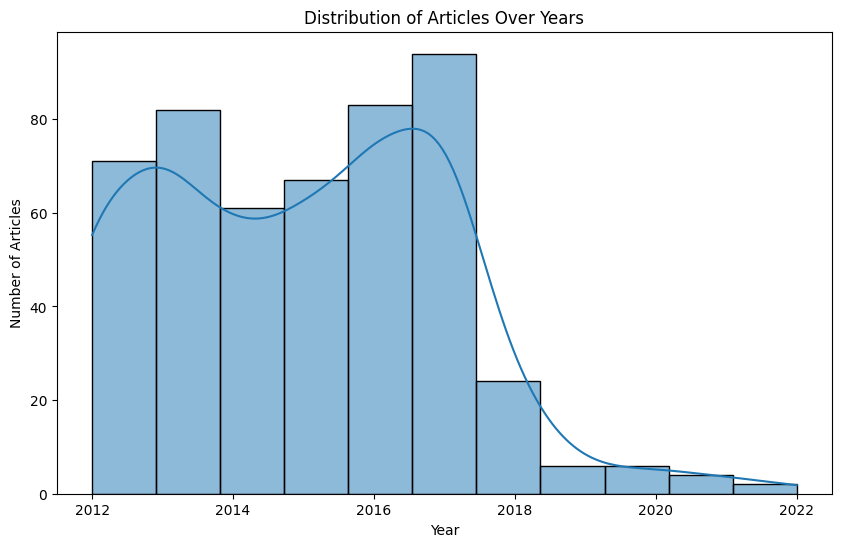

In [ ]:
#Conveting the date format
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

#Plotting Distribution of Articles over years
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='year', bins=len(df['year'].unique()), kde=True)
plt.title('Distribution of Articles Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.show()

The graph above shows the distribution of news articles in terms of number of articles published each year spanning across a time period of 10 years from 2012 - 2022. It shows how the number of articles published peaked during the years of 2016-2017 but then dropped drastically in the years following 2018 to 2022 to less than 10 articles per year

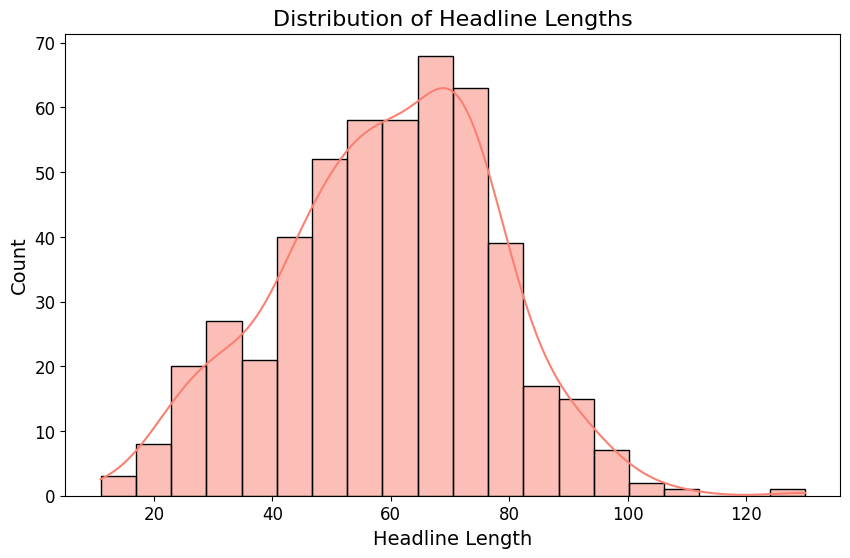

In [ ]:
#Finding length of each headline
df['headline_length'] = df['headline'].apply(len)

#Plotting Distribution of Headline lengths for articles
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Headline Lengths', fontsize=16)
plt.xlabel('Headline Length', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

This graph shows the distribution of headline lenghts in terms of number of words and shows the frequency for each. As seen clearly, there is a normal distribution and it implies that headlines that have a length of 60-80 are mosr frequent, having a count of >50, as compared to other headline lenghts that range less than 40 words or even greater than 100 words, their count ranges from 0-20 at max.

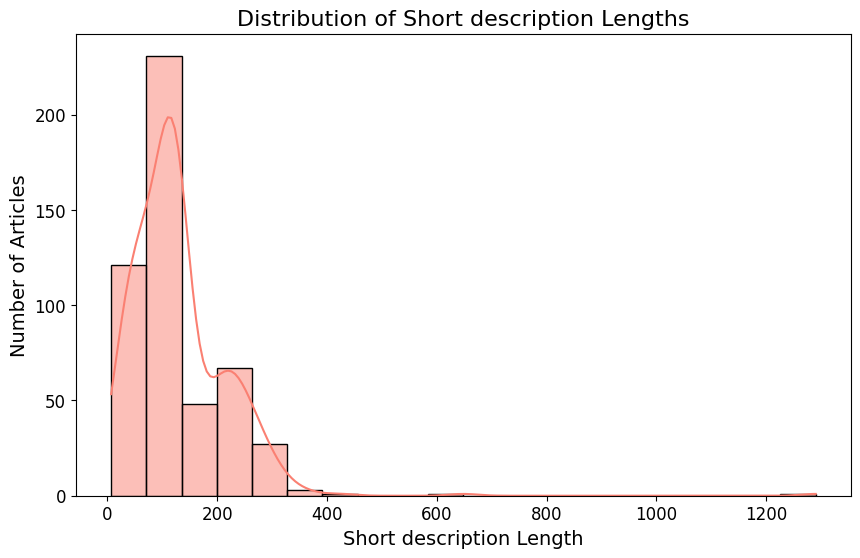

In [ ]:
df['short_description_length'] = df['short_description'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['short_description_length'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Short description Lengths', fontsize=16)
plt.xlabel('Short description Length', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

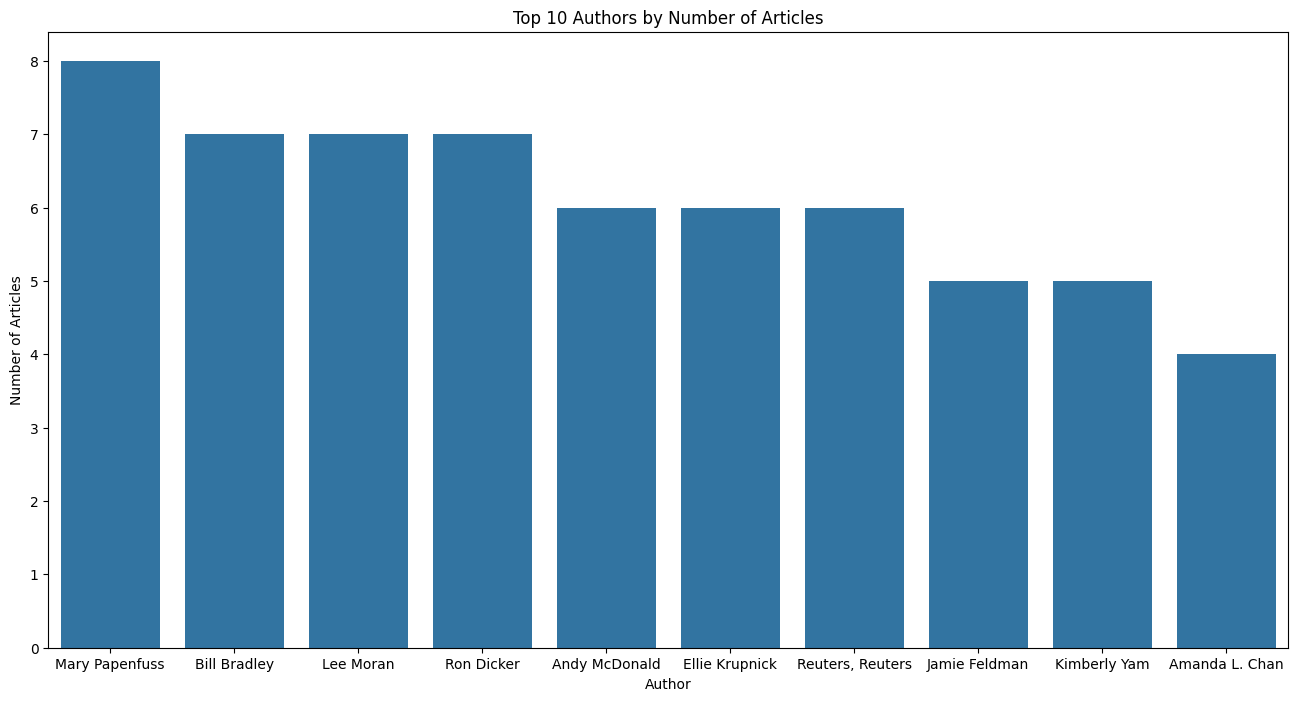

In [ ]:
#Top 10 Authors
top10_authors = df['authors'].value_counts().head(10)

#Plotting the Top 10 Authors
plt.figure(figsize=(16, 8))
sns.barplot(x=top10_authors.index, y=top10_authors.values )
plt.title('Top 10 Authors by Number of Articles')
plt.xlabel('Author')
plt.ylabel('Number of Articles')
plt.show()

Based  on the Wordcloud output, we could see that the most common word is "Trump". This supports our output for top most category as "Politics".


In [ ]:
#category_per_year = df.groupby(['year', 'category']).size().reset_index(name='count')

#fig, axes = plt.subplots(nrows=len(years), ncols=1, figsize=(8, 4 * len(years)))

#if len(years) == 1:
    #axes = [axes]

#for i, year in enumerate(sorted(years)):
    #top_categories = category_per_year[category_per_year['year'] == year].nlargest(5, 'count')

    #sns.barplot(x='category', y='count', data=top_categories, ax=axes[i])
    #axes[i].set_title(f'Top 5 Categories in {year}')
    #axes[i].set_xlabel('')
   # axes[i].set_ylabel('Number of Articles')

#plt.tight_layout()
#plt.show();


## Preprocessing

In [ ]:
headlines = pd.DataFrame(df['headline'], columns =['headline'])

#Converting headlines to lowercase and removig any punctuation
headlines = headlines['headline'].str.lower().str.replace('[^\w\s]','')
headlines

<ipython-input-209-fe0b589335a6>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  headlines = headlines['headline'].str.lower().str.replace('[^\w\s]','')


54227     who says all countries should tax sugary drink...
93887     this fake town exists solely to test driverles...
133909    15 different delicious ways to interpret greek...
208957              two steps to rebooting your resolutions
32968     georgia state senator under fire for photo wit...
                                ...                        
185478    kindle ebook refunds amazon says users are ent...
162118     dear mom with a prenatal down syndrome diagnosis
164605    sarslike virus 17 now dead from coronavirus in...
25603     democrats target one of their own for remainin...
152988    girls broken arm allegedly treated with ice cr...
Name: headline, Length: 500, dtype: object

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
#Lemmatize the headlines
lemma_headline = [lemmatizer.lemmatize(t) for t in headlines]
lemma_headline

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['who says all countries should tax sugary drinks to curb obesity',
 'this fake town exists solely to test driverless cars',
 '15 different delicious ways to interpret greek salad',
 'two steps to rebooting your resolutions',
 'georgia state senator under fire for photo with armed antigovernment militia',
 'a valentine blog for parents of teens',
 'madonna beauty evolution from virgin brunette babe to material girl pop star photos',
 'isabel  ruben toledo fashions cutest couple photos',
 'victoria beckham haircut too short too long or just right photos poll',
 '3 amazing strategies to becoming highly successful',
 'licensing medical marijuana stirs up trouble for states',
 'marion cotillard the dark knight rises star is all dolledup at dior photo',
 'try this laundry trick to see if youre using too much detergent',
 'no more diets  eat and live mindfully instead',
 'this dog wont let his new baby brother cry alone',
 'eliminating the pay gap',
 'lady gaga explains friendship with donat

In [ ]:
short_description = pd.DataFrame(df['short_description'], columns =['short_description'])

#Converting short descriotion to lowercase and removig any punctuation
short_description = short_description['short_description'].str.lower().str.replace('[^\w\s]','')
short_description

<ipython-input-211-f18e1922a55d>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  short_description = short_description['short_description'].str.lower().str.replace('[^\w\s]','')


54227     a 20 percent tax could reduce the consumption ...
93887     selfdriving vehicles now have a neighborhood a...
133909               pizza pasta grilled cheese you name it
208957    real change can be hard to come by and its tem...
32968     republican michael williams spoke at the march...
                                ...                        
185478    if the court approves the settlements the publ...
162118    i cannot tell you what challenges your preciou...
164605    a nonsaudi whose nationality and age were not ...
25603              they said he risks tarnishing his legacy
152988    a michigan charter school has come under fire ...
Name: short_description, Length: 500, dtype: object

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
#Lemmatize the short description
lemma_short_description = [lemmatizer.lemmatize(t) for t in short_description]
lemma_short_description

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['a 20 percent tax could reduce the consumption of sugary drinks by the same proportion',
 'selfdriving vehicles now have a neighborhood all their own  where researchers can study them in new ways',
 'pizza pasta grilled cheese you name it',
 'real change can be hard to come by and its tempting to want to start lowering expectations or throw in the towel on your goal completely  but dont despair because its not too late to push the reset button and try tackling those goals again',
 'republican michael williams spoke at the march against sharia rally in atlanta',
 'valentines day is less than a month away and ive got some real inside info on whats going on in the teenage world',
 'in honor of madonnas 54th birthday today august 16th were taking a look back at the pop icons biggest beauty moments',
 'as they spoke a slideshow of photos slid by in a reel on the wall behind them featuring isabels sketches editorials pictures',
 'now posh has stuck a rather lovely middleground trimming her 

###Bag of Words

Using Bag of words to Vectorize the sentences

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#Initializing CountVectorizer with English stop words
cv = CountVectorizer(stop_words='english') #tokenizer= lambda x: word_tokenize(x), remove the stop_words='english'

#Fitting CountVectorizer to headline
cv.fit(lemma_headline)

#Printing the vocabulary with number of unique words i.e tokens
print('number of `tokens`', len(cv.vocabulary_))
cv.vocabulary_

number of `tokens` 2253


{'says': 1736,
 'countries': 476,
 'tax': 1980,
 'sugary': 1932,
 'drinks': 633,
 'curb': 505,
 'obesity': 1397,
 'fake': 729,
 'town': 2035,
 'exists': 708,
 'solely': 1843,
 'test': 1995,
 'driverless': 634,
 'cars': 348,
 '15': 6,
 'different': 581,
 'delicious': 551,
 'ways': 2177,
 'interpret': 1039,
 'greek': 893,
 'salad': 1715,
 'steps': 1899,
 'rebooting': 1625,
 'resolutions': 1664,
 'georgia': 850,
 'state': 1890,
 'senator': 1766,
 'photo': 1476,
 'armed': 148,
 'antigovernment': 135,
 'militia': 1294,
 'valentine': 2117,
 'blog': 260,
 'parents': 1441,
 'teens': 1987,
 'madonna': 1221,
 'beauty': 211,
 'evolution': 701,
 'virgin': 2143,
 'brunette': 306,
 'babe': 176,
 'material': 1251,
 'girl': 859,
 'pop': 1513,
 'star': 1884,
 'photos': 1478,
 'isabel': 1048,
 'ruben': 1698,
 'toledo': 2026,
 'fashions': 746,
 'cutest': 512,
 'couple': 478,
 'victoria': 2130,
 'beckham': 213,
 'haircut': 915,
 'short': 1794,
 'long': 1204,
 'just': 1086,
 'right': 1680,
 'poll': 1511,
 

In [ ]:
#Transforming the headline sentences to BoW Format
dtm_headline = cv.transform(lemma_headline)
bow_headline = pd.DataFrame(dtm_headline.toarray(), columns=cv.get_feature_names_out())
bow_headline

,10,100,101,116,12,13,15,16yearold,17,1886,...,years,yoga,york,youll,youre,youtube,youve,zealand,zombie,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#Initializing CountVectorizer with English stop words
cv1 = CountVectorizer(stop_words='english')

#Fitting CountVectorizer to short_description
cv1.fit(lemma_short_description)

#Printing the vocabulary with number of unique words i.e tokens
print('number of `tokens`', len(cv1.vocabulary_))
cv1.vocabulary_

number of `tokens` 3341


{'20': 18,
 'percent': 2175,
 'tax': 2943,
 'reduce': 2441,
 'consumption': 658,
 'sugary': 2873,
 'drinks': 912,
 'proportion': 2346,
 'selfdriving': 2652,
 'vehicles': 3154,
 'neighborhood': 1998,
 'researchers': 2506,
 'study': 2857,
 'new': 2003,
 'ways': 3220,
 'pizza': 2218,
 'pasta': 2154,
 'grilled': 1311,
 'cheese': 533,
 'real': 2415,
 'change': 514,
 'hard': 1349,
 'come': 606,
 'tempting': 2959,
 'want': 3201,
 'start': 2816,
 'lowering': 1794,
 'expectations': 1045,
 'throw': 3000,
 'towel': 3030,
 'goal': 1279,
 'completely': 627,
 'dont': 893,
 'despair': 818,
 'late': 1664,
 'push': 2370,
 'reset': 2507,
 'button': 450,
 'try': 3067,
 'tackling': 2921,
 'goals': 1280,
 'republican': 2500,
 'michael': 1887,
 'williams': 3263,
 'spoke': 2798,
 'march': 1829,
 'sharia': 2695,
 'rally': 2394,
 'atlanta': 257,
 'valentines': 3140,
 'day': 764,
 'month': 1937,
 'away': 285,
 'ive': 1579,
 'got': 1292,
 'inside': 1534,
 'info': 1521,
 'whats': 3251,
 'going': 1285,
 'teenage':

In [ ]:
#Transforming the short_description sentences to BoW Format
dtm_short_desc = cv1.transform(lemma_short_description)
bow_short_desc = pd.DataFrame(dtm_short_desc.toarray(), columns=cv1.get_feature_names_out())
bow_short_desc

,10,100,10000,11,12,12yearold,138,14,14th,15,...,грани,животные,зоопарка,изза,на,новость,отсутствия,плохая,финансирования,харьковского
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
recognized_tokens_sentence0 = cv.inverse_transform([bow_headline.iloc[1]])
recognized_tokens_sentence0

[array(['cars', 'driverless', 'exists', 'fake', 'solely', 'test', 'town'],
       dtype='<U16')]

In [ ]:
recognized_tokens_sentence1 = cv1.inverse_transform([bow_short_desc.iloc[2]])
recognized_tokens_sentence1

[array(['cheese', 'grilled', 'pasta', 'pizza'], dtype='<U32')]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

# Cosine sim
cos_sim_headline = pd.DataFrame(cosine_similarity(bow_headline, bow_headline))
cos_sim_headline

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.133631,0.0,0.0,0.0,0.0
1,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.188982,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.133631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0
496,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0
497,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0
498,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0


In [ ]:
cos_sim_short_description = pd.DataFrame(cosine_similarity(bow_short_desc, bow_short_desc))
cos_sim_short_description

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,0.0,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.0000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,1.000000,0.0,0.059131,0.0,0.0000,0.064282,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.061546,0.000000,0.061546
4,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0,0.1066,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000
496,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.057735
497,0.0,0.0,0.0,0.061546,0.0,0.000000,0.0,0.0000,0.087039,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.144338,0.000000
498,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.144338,1.000000,0.000000


In [ ]:
q_headline = "dakota"

q_headline_vector = cv.transform([q_headline])

pd.DataFrame(cosine_similarity(q_headline_vector, bow_headline))

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np
similarity_matrix_headline = cosine_similarity(q_headline_vector, bow_headline)
similarity_threshold_headline = 0.05
matching_indices_headline = np.where(similarity_matrix_headline > similarity_threshold_headline)[1]
matching_headlines = [lemma_headline[i] for i in matching_indices_headline]
print("Matching headlines:")
for l_headline in matching_headlines:
    print(l_headline)


Matching headlines:


###TF/IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
tfid.fit(lemma_headline)

tfid_headline = pd.DataFrame(tfid.transform(lemma_headline).toarray(), columns = tfid.get_feature_names_out()) #Vectorize the headlines

In [ ]:
tfid_headline.head()

,10,100,101,116,12,13,15,16yearold,17,1886,...,you,youll,your,youre,yourself,youtube,youve,zealand,zombie,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.389621,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.297985,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid1 = TfidfVectorizer()
tfid1.fit(lemma_short_description)
tfid1_short_description = pd.DataFrame(tfid1.transform(lemma_short_description).toarray(), columns = tfid1.get_feature_names_out()) #Vectorize the short description

In [ ]:
tfid1_short_description.head()

,10,100,10000,11,12,12yearold,138,14,14th,15,...,грани,животные,зоопарка,изза,на,новость,отсутствия,плохая,финансирования,харьковского
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###News Category Classification

In [ ]:
X = df['lemma_headline']
y = df['category']

KeyError: 'lemma_headline'

###Basic model

Unsupervised step: Let's vectorize

In [ ]:
from sklearn.model_selection import train_test_split

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english') #lowercase=False

# create the vectorizer.
X_train_counts = vectorizer.fit_transform(X_train)

# vectorize the test set
X_test_counts = vectorizer.transform(X_test)

In [ ]:
X_train_counts.toarray().shape

Supervised learning: Train a classifier and check the accuracy result.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_counts, y_train)

# Predict on the test data
y_pred = model.predict(X_test_counts)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
#pd.DataFrame(confusion_matrix(y_test, y_pred, normalize='true'), columns=model.classes_, index=model.classes_ )

###N-grams model

Split the Data into Train and Test

In [ ]:
lowercase= True
n_gram_range = (1,3)

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

def get_split_datasets(X, y, test_size=0.2, stratify=True):

    if stratify:
        # Stratify the split to maintain the distribution of the categories across train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    else:
        # Perform a simple split without stratification
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=None)

    return X_train, X_test, y_train, y_test


In [ ]:
X_train, X_test, y_train, y_test = get_split_datasets(X, y, stratify=False)

In [ ]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_ngram = CountVectorizer(lowercase=lowercase, ngram_range=n_gram_range)

# create the vectorizer.
X_train_ngram = vectorizer_ngram.fit_transform(X_train)

# vectorize the test set
X_test_ngram = vectorizer_ngram.transform(X_test)

In [ ]:
X_train_ngram_df = pd.DataFrame(X_train_ngram.toarray(), columns=vectorizer_ngram.get_feature_names_out())

Classify the Category and Check the accuracy

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import sklearn


# Train the model using Logistic Regression
model_ngram = LogisticRegression(max_iter=1000)
model_ngram.fit(X_train_ngram, y_train)

# Predict on the test data
y_pred_ngram = model_ngram.predict(X_test_ngram)

# Evaluate the model
accuracy_ngram = accuracy_score(y_test, y_pred_ngram)
print(accuracy_ngram)


In [ ]:
headlines1 = pd.DataFrame(df['headline'], columns =['headline'])
headlines1 = headlines1['headline'].str.lower().str.replace('[^\w\s]','') #Headlines to lowercase & remove punctuation
headlines1

In [ ]:
tokenized_headlines1 = [word_tokenize(t) for t in headlines1]

In [ ]:
from gensim.models import Word2Vec
import numpy as np

# We construct and train our own Word2Vec (Not a common practice but just to see how it works.)
model_word2vec = Word2Vec(sentences=tokenized_headlines1, vector_size=300, window=3, min_count=1, workers=4, negative=20, epochs=5000)

print("All words captured by the model:", model_word2vec.wv.key_to_index)
print("The embedding of", "good", "is", model_word2vec.wv["good"])

# Get the embedding for each word captured by the model.
embeddings = np.array([model_word2vec.wv[word] for word in model_word2vec.wv.key_to_index])

In [ ]:
embeddings

In [ ]:
embeddings.shape

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import plotly.express as px
import pandas as pd

# dim_red = TSNE(n_components=3, perplexity=2, random_state=42)
dim_red = PCA(n_components=3, random_state=42)
embeddings_for_visualization = dim_red.fit_transform(embeddings)

# Convert the reduced embeddings and words into a DataFrame
df = pd.DataFrame(embeddings_for_visualization, columns=['x', 'y', 'z'])
df['word'] = model_word2vec.wv.index_to_key

# Create a scatter plot using Plotly
fig = px.scatter_3d(df, x='x', y='y', z='z', text='word', title='Word Embeddings Visualization')
fig.update_traces(marker=dict(size=8, opacity=0.8, line=dict(width=1, color='DarkSlateGrey')),
                  textposition='top center')
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
df

In [ ]:
df2=df[['category','headline']]

In [ ]:
# First, word tokenize.
tokenized_headline = [word_tokenize(t) for t in df2['headline'].str.lower()]

# Create and train the Word2Vec model
model_word2vec = Word2Vec(sentences=tokenized_headline, vector_size=300, window=5, min_count=1, workers=4) #, negative=50 , epochs=50

# Construct the embeddings (i.e., vectorization) using your Word2Vec model
embeddings = [] # List of message embeddings
for tokenized_document in tokenized_headline:# Iterate through the messages
  headline_word_embeddings = [model_word2vec.wv[word] for word in tokenized_document] # Calculate the embedding for each word in the message. Put them all in a list.
  headline_embedding = np.mean(headline_word_embeddings, axis=0) # Average the word embeddings to get a sentence embedding
  embeddings = embeddings + [headline_embedding] # Add the current message embedding into the list of embeddings for all messages.

embeddings = np.array(embeddings)

In [ ]:
headline = df2.iloc[1].headline.lower()

print("a headline:", headline)

headline_word_embeddings = []
print("Embeddings for each token in the headline:")
for word in word_tokenize(headline):
  word_embedding = model_word2vec.wv[word]
  print(word, ":", word_embedding)
  headline_word_embeddings = headline_word_embeddings + [word_embedding]
  print("")

print("Embedding of the entir headline (the above averaged):", np.mean(headline_word_embeddings, axis=0))

In [ ]:
embeddings.shape

In [ ]:
y.shape

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = get_split_datasets(embeddings, y, stratify=False)

In [ ]:
model_word2vec_classification = LogisticRegression(max_iter=1000)
model_word2vec_classification.fit(X_train, y_train)

# Predict on the test data
y_pred2 = model_word2vec_classification.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred2)
f1_score_macro = f1_score(y_test, y_pred2, average='macro')  # Macro-average F1-score for multiclass classification
classification_rep = classification_report(y_test, y_pred2)

# Display results
print(f"Accuracy: {accuracy2}")
print(f"F1-score (Macro): {f1_score_macro}")
print("Classification Report:")
print(classification_rep)
